<a href="https://colab.research.google.com/github/TomAmster/NLP-TAU-2020/blob/master/0_EDA_Data_Exploration_and_Vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import itertools
from google.colab import drive
import matplotlib.pyplot as plt
import csv
import seaborn as sns 
import numpy as np
from  numpy import int32
from collections import Counter, defaultdict
from os import path

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# EDA - Explaratory Data Analysis

## **Load MIMIC tables NOTEEVENTS and DIAGNOSES_ICD**

In [0]:
note_events=pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/NOTEEVENTS.csv',dtype={'ROW_ID':np.int32, 'SUBJECT_ID': np.int32,'HADM_ID': np.float64,
                                       'CHARTDATE':str,'STORETIME':str,'CHARTTIME':str,
                                       'STORETIME': str,'CATEGORY': str,'DESCRIPTION':str,'CGID':str,'ISERROR':str,
                                        'TEXT':str}, parse_dates=['CHARTDATE'])

diagnoses_icd=pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/DIAGNOSES_ICD.csv',dtype={'ROW_ID':np.int32, 'SUBJECT_ID': np.int32,'HADM_ID': np.int32,
                                            'SEQ_NUM':  np.float64,'ICD9_CODE':str})

## NoteEvents Exploration

In [0]:
note_events.count()

ROW_ID         2083180
SUBJECT_ID     2083180
HADM_ID        1851344
CHARTDATE      2083180
CHARTTIME      1766614
STORETIME      1246404
CATEGORY       2083180
DESCRIPTION    2083180
CGID           1246404
ISERROR            886
TEXT           2083180
dtype: int64

In [0]:
note_events.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [0]:
note_events.groupby('CATEGORY').count()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,DESCRIPTION,CGID,ISERROR,TEXT
CATEGORY,,,,,,,,,,
Case Management,967,967,954,967,967,967,967,967,14,967
Consult,98,98,98,98,98,98,98,98,0,98
Discharge summary,59652,59652,59652,59652,0,0,59652,0,0,59652
ECG,209051,209051,138190,209051,0,0,209051,0,0,209051
Echo,45794,45794,34037,45794,0,0,45794,0,0,45794
General,8301,8301,8209,8301,8260,8301,8301,8301,65,8301
Nursing,223556,223556,220758,223556,222172,223556,223556,223556,374,223556
Nursing/other,822497,822497,821258,822497,822497,822497,822497,822497,0,822497
Nutrition,9418,9418,9378,9418,9411,9418,9418,9418,18,9418


## Diagnoses_ICD Exploration

In [0]:
diagnoses_icd['ICD9_CODE']=diagnoses_icd['ICD9_CODE'].str.pad(4,'left','0')
diagnoses_icd['ICD9_CHAP']=diagnoses_icd['ICD9_CODE'].str.slice(0,3)
diagnoses_icd.count()

ROW_ID        651047
SUBJECT_ID    651047
HADM_ID       651047
SEQ_NUM       651000
ICD9_CODE     651000
ICD9_CHAP     651000
dtype: int64

In [0]:
diagnoses_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CHAP
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,0486,048
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425


In [0]:
a = pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/NOTEEVENTS_SPLIT_1_TOKENIZED_LABELED.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b79ac4668>,
      dtype=object)

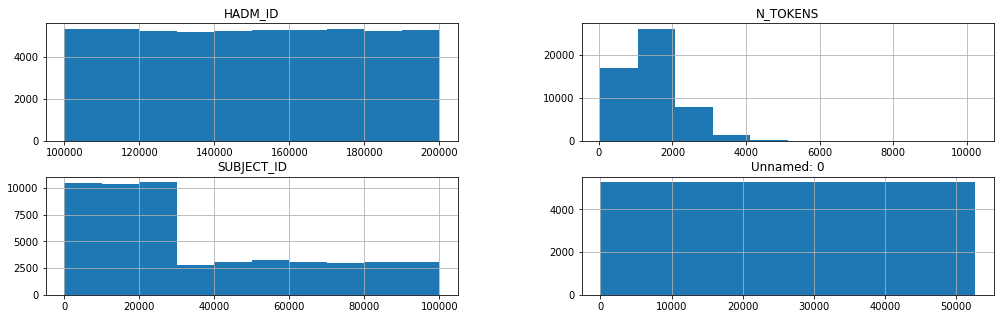

In [0]:
a.hist(figsize= (17, 5))

In [0]:
a.head()

,Unnamed: 0,SUBJECT_ID,HADM_ID,TEXT,N_TOKENS,LABELS
0,0,3,145834,"[['admission', 'date'], ['october'], ['dischar...",2112,"['038.9', '785.59', '584.9', '427.5', '410.71'..."
1,1,4,185777,"[['admission', 'date'], ['march'], ['discharge...",1429,"['042', '136.3', '799.4', '276.3', '790.7', '5..."
2,2,6,107064,"[['admission', 'date'], ['may'], ['discharge',...",1026,"['403.91', '444.0', '997.2', '276.6', '276.7',..."
3,3,9,150750,"[['admission', 'date'], ['november'], ['discha...",1369,"['431', '507.0', '428.0', '584.9', '276.5', '4..."
4,4,10,184167,"[['admission', 'date'], ['june'], ['discharge'...",507,"['V30.00', '774.2', '765.25', '765.15', 'V29.0..."


## Codes Per Visit

In [0]:
notes_labeled_train = pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/notes_labeled_train1')
notes_labeled_test = pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/notes_labeled_test1')
notes_labeled_dev = pd.read_csv('/content/drive/Shared drives/NLP Seminar/Data/notes_labeled_dev1')

In [0]:
notes_labeled_dev.head()

,Unnamed: 0,SUBJECT_ID,HADM_ID,TEXT,N_TOKENS,LABELS
0,47454,82609,177315,"[['admission', 'date'], ['july'], ['discharge'...",1811,"['038.11', '349.82', '421.0', '584.9', '707.03..."
1,47455,82618,192175,"[['admission', 'date'], ['september'], ['disch...",1624,"['560.9', '584.9', '482.82', '568.0', '401.9',..."
2,47456,82619,112121,"[['admission', 'date'], ['may'], ['discharge',...",1400,"['424.1', '428.23', '997.1', '287.5', '428.0',..."
3,47457,82621,120965,"[['admission', 'date'], ['october'], ['dischar...",1695,"['414.01', '411.1', '427.1', '401.9', '788.29'..."
4,47458,82625,170794,"[['admission', 'date'], ['july'], ['discharge'...",780,"['864.04', '285.1', '868.03', '276.2', 'E816.0..."


In [0]:
print(a.shape)
print(notes_labeled_train.shape)
print(notes_labeled_test.shape)
print(notes_labeled_dev.shape)

(52726, 6)
(36908, 6)
(10546, 6)
(5272, 6)


In [0]:
num_codes_per_visit_total = a['LABELS'].apply(lambda x: len(x.split(",")))
num_codes_per_visit_train = notes_labeled_train['LABELS'].apply(lambda x: len(x.split(",")))
num_codes_per_visit_test = notes_labeled_test['LABELS'].apply(lambda x: len(x.split(",")))
num_codes_per_visit_dev = notes_labeled_dev['LABELS'].apply(lambda x: len(x.split(",")))

In [0]:
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(num_codes_per_visit_total),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(num_codes_per_visit_train),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(num_codes_per_visit_test),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(num_codes_per_visit_dev),2))

Number of ICD9 codes per visit:       16.10
Number of ICD9 codes per visit:       15.18
Number of ICD9 codes per visit:       18.34
Number of ICD9 codes per visit:       18.03


# Number Of Unique Patients

In [0]:
print("Number of unique subjects: {}".format(len(a.SUBJECT_ID.unique())))
print("Number of unique subjects: {}".format(len(notes_labeled_train.SUBJECT_ID.unique())))
print("Number of unique subjects: {}".format(len(notes_labeled_test.SUBJECT_ID.unique())))
print("Number of unique subjects: {}".format(len(notes_labeled_dev.SUBJECT_ID.unique())))


Number of unique subjects: 41127
Number of unique subjects: 28139
Number of unique subjects: 8632
Number of unique subjects: 4357


# Words Per Note

In [0]:
note_size_total = a['TEXT'].apply(lambda x: len(x))
note_size_train = notes_labeled_train['TEXT'].apply(lambda x: len(x))
note_size_visit_test = notes_labeled_test['TEXT'].apply(lambda x: len(x))
note_size_visit_dev = notes_labeled_dev['TEXT'].apply(lambda x: len(x))

In [0]:
note_size_total[0]

20626

In [0]:
print("Average Note Length:       {0:.{1}f}".format(np.mean(note_size_total),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(note_size_train),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(note_size_visit_test),2))
print("Number of ICD9 codes per visit:       {0:.{1}f}".format(np.mean(note_size_visit_dev),2))

Number of ICD9 codes per visit:       14516.35
Number of ICD9 codes per visit:       13351.41
Number of ICD9 codes per visit:       17242.75
Number of ICD9 codes per visit:       17218.02


In [0]:
print('Nb codes > 1000 occurences= '+str(len(a[a>1000]))+
      '  \nNb codes 1000-100 occurences = ' +str(len(a[(a<1000)&(a>100)]))
      +'  \nNb codes <100 occurences = ' +str(len(a[a<100])) )

Nb codes > 1000 occurences= 125  
Nb codes 1000-100 occurences = 748  
Nb codes <100 occurences = 6093


In [0]:
a[a>1000].plot(kind='bar',figsize= (17, 10))


In [0]:
a=diagnoses_icd.groupby('ICD9_CODE')[ 'HADM_ID'].count()
diagnoses_icd_freq=diagnoses_icd[diagnoses_icd['ICD9_CODE'].isin(a[a>1000].keys())]
df=diagnoses_icd_freq.groupby('HADM_ID')['ICD9_CODE'].apply(lambda x: "['%s']" %"','".join(x))
df=df.apply(lambda x : eval(x))
#diagnoses_icd_freq['HADM_ID']=df.keys()
diagnoses_icd_freq=pd.DataFrame(df)
diagnoses_icd_freq.head()

,ICD9_CODE
HADM_ID,
100001,"[5849, V5867, 40390]"
100003,"[2851, 07054, 5715, 4019]"
100006,"[51881, 0486, 2761, V1251, V1582]"
100007,"[0486, 4019]"
100009,"[41401, 25000, 27800, 4111, V4582, V1582, 2859..."


## Selection of the most frequent ICD chapters


In [0]:
a=diagnoses_icd.groupby('ICD9_CHAP')[ 'HADM_ID'].count().sort_values(ascending=False)


In [0]:
print('number of codes per chapter > 1000 occurences= '+str(len(a[a>1000]))+
      '  \nNb number of codes per chapter 1000-100 occurences = ' +str(len(a[(a<1000)&(a>100)]))
      +'  \nNb number of codes per chapter<100 occurences = ' +str(len(a[a<100])) )

number of codes per chapter > 1000 occurences= 139  
Nb number of codes per chapter 1000-100 occurences = 266  
Nb number of codes per chapter<100 occurences = 485


Selecting datapoints with code belonging to most frequent codes

In [0]:
a=diagnoses_icd.groupby('ICD9_CHAP')['HADM_ID'].count()
diagnoses_icd_chap_freq=diagnoses_icd[diagnoses_icd['ICD9_CHAP'].isin(a[a>1000].keys())]

In [0]:
print('Number of datapoints selected = '+str(diagnoses_icd_chap_freq['HADM_ID'].nunique())+
      '  \n Number of ICD chapters selected = ' +str(diagnoses_icd_chap_freq['ICD9_CHAP'].nunique()))

Number of datapoints selected = 58653  
 Number of ICD chapters selected = 139


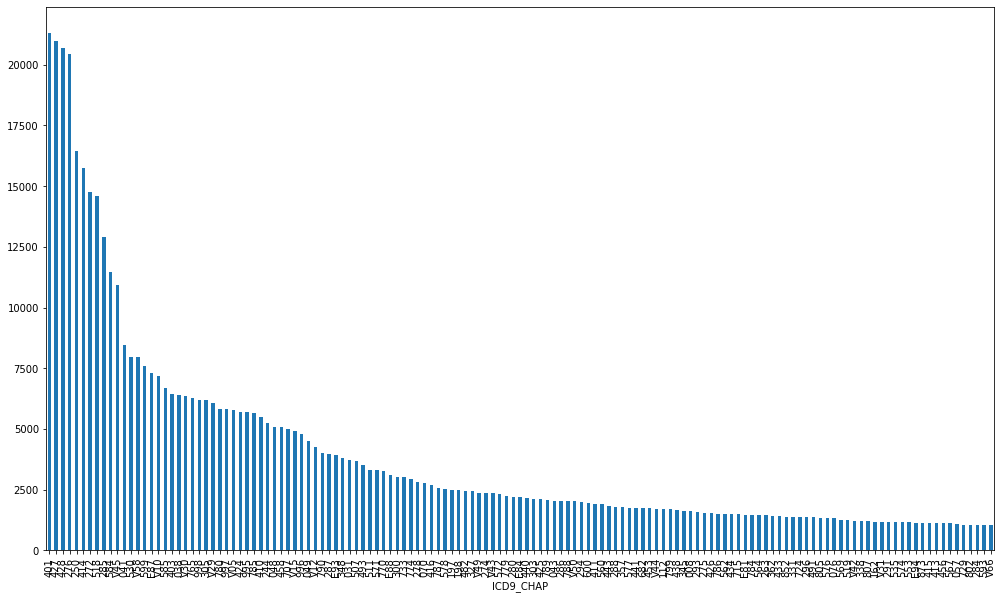

In [0]:
diagnoses_icd_chap_freq.groupby('ICD9_CHAP')['HADM_ID'].count().sort_values(ascending=False).plot(kind='bar',figsize= (17, 10))


In [0]:
df=diagnoses_icd_chap_freq.groupby('HADM_ID',)['ICD9_CHAP'].apply(lambda x: "['%s']" %"','".join(x))
df=df.apply(lambda x : eval(x))
diagnoses_icd_chap_freq=pd.DataFrame(df)
#diagnoses_icd_chap_freq['HADM_ID']=df.keys()
diagnoses_icd_chap_freq.head()

,ICD9_CHAP
HADM_ID,
100001,"[250, 584, 578, V58, 250, 458, 250, 403, 585, ..."
100003,"[285, 070, 571, 456, 401, 535]"
100006,"[493, 518, 048, 276, 785, V12, V15]"
100007,"[560, 997, 048, 401]"
100009,"[414, 996, 414, 250, 278, 414, 411, V45, V15, ..."


**Build the final X and y**

Merge of the most important notes to make a single text by hospitalisation.

In the first place we will focus on discharge summaries.

In [0]:
selected_doc=['Discharge summary']
df=note_events[note_events['CATEGORY'].isin(selected_doc)].groupby('HADM_ID')['TEXT'].apply(lambda x: "{%s}" % ', '.join(x))
df2=pd.DataFrame(df)
#df2['HADM_ID']=df.keys()
df2.head()

,TEXT
HADM_ID,
100001.0,{Admission Date: [**2117-9-11**] ...
100003.0,{Admission Date: [**2150-4-17**] ...
100006.0,{Admission Date: [**2108-4-6**] Dischar...
100007.0,{Admission Date: [**2145-3-31**] ...
100009.0,{Admission Date: [**2162-5-16**] ...


Create one dataframe for selected diagnoses with merge with texts on HADM_ID, and the other one for selected chapters, and concatenate them to have the final dataframe that will be use for prediction



In [0]:
df2=df2.reset_index()
df2.head()

,HADM_ID,TEXT
0,100001.0,{Admission Date: [**2117-9-11**] ...
1,100003.0,{Admission Date: [**2150-4-17**] ...
2,100006.0,{Admission Date: [**2108-4-6**] Dischar...
3,100007.0,{Admission Date: [**2145-3-31**] ...
4,100009.0,{Admission Date: [**2162-5-16**] ...


In [0]:
diagnoses_icd_chap_freq=diagnoses_icd_chap_freq.reset_index()
diagnoses_icd_chap_freq.head()

,HADM_ID,ICD9_CHAP
0,100001,"[250, 584, 578, V58, 250, 458, 250, 403, 585, ..."
1,100003,"[285, 070, 571, 456, 401, 535]"
2,100006,"[493, 518, 048, 276, 785, V12, V15]"
3,100007,"[560, 997, 048, 401]"
4,100009,"[414, 996, 414, 250, 278, 414, 411, V45, V15, ..."


In [0]:
note_diagnones=pd.merge(df2,diagnoses_icd_chap_freq[['HADM_ID','ICD9_CHAP']],on='HADM_ID')



In [0]:
note_diagnones.head()

,HADM_ID,TEXT,ICD9_CHAP
0,100001.0,{Admission Date: [**2117-9-11**] ...,"[250, 584, 578, V58, 250, 458, 250, 403, 585, ..."
1,100003.0,{Admission Date: [**2150-4-17**] ...,"[285, 070, 571, 456, 401, 535]"
2,100006.0,{Admission Date: [**2108-4-6**] Dischar...,"[493, 518, 048, 276, 785, V12, V15]"
3,100007.0,{Admission Date: [**2145-3-31**] ...,"[560, 997, 048, 401]"
4,100009.0,{Admission Date: [**2162-5-16**] ...,"[414, 996, 414, 250, 278, 414, 411, V45, V15, ..."


In [0]:
note_diagnones.shape

(52514, 3)

In [0]:
from sklearn import model_selection
train, test = model_selection.train_test_split(note_diagnones[['HADM_ID','TEXT','ICD9_CHAP']],test_size=0.2)
print('Size of train: '+str(train.shape[0])+' \nSize of test: '+str(test.shape[0]) )


Size of train: 42011 
Size of test: 10503


In [0]:
train.to_csv('/content/drive/Shared drives/NLP Seminar/Data/train.csv',index=False)
test.to_csv('/content/drive/Shared drives/NLP Seminar/Data/test.csv',index=False)